In [3]:
# Import some libraries

import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from matplotlib import pyplot as plt
from res.plot_lib import set_default
set_default(figsize=(15, 4))

In [2]:
# Convert vector to image

def to_img(y):
    y = 0.5 * (y + 1)
    y = y.view(y.size(0), 28, 28)
    return y

In [3]:
# Displaying routine

def display_images(in_, out, n=1):
    for N in range(n):
        if in_ is not None:
            in_pic = to_img(in_.cpu().data)
            plt.figure(figsize=(18, 6))
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = to_img(out.cpu().data)
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')

In [4]:
# Define data loading step

batch_size = 256

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataset = MNIST('./data', transform=img_transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

100%|██████████| 9.91M/9.91M [00:08<00:00, 1.20MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 334kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 2.30MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 937kB/s]


In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [6]:
# Define model architecture and reconstruction loss

# n = 28 x 28 = 784
d = 30  # for standard AE (under-complete hidden layer)
# d = 500  # for denoising AE (over-complete hidden layer)

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, d),
            nn.Tanh(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(d, 28 * 28),
            nn.Tanh(),
        )

    def forward(self, y):
        h = self.encoder(y)
        ỹ = self.decoder(h)
        return ỹ
    
ae = Autoencoder().to(device)
criterion = nn.MSELoss()

In [7]:
# Configure the optimiser

learning_rate = 1e-3

optimizer = torch.optim.Adam(
    ae.parameters(),
    lr=learning_rate,
)

*Comment* or *un-comment out* a few lines of code to seamlessly switch between *standard AE* and *denoising one*.

Don't forget to **(1)** change the size of the hidden layer accordingly, **(2)** re-generate the model, and **(3)** re-pass the parameters to the optimiser.

epoch [1/20], loss:0.2013
epoch [2/20], loss:0.1459
epoch [3/20], loss:0.1202
epoch [4/20], loss:0.0973
epoch [5/20], loss:0.0919
epoch [6/20], loss:0.0832
epoch [7/20], loss:0.0843
epoch [8/20], loss:0.0818
epoch [9/20], loss:0.0759
epoch [10/20], loss:0.0664
epoch [11/20], loss:0.0726
epoch [12/20], loss:0.0744
epoch [13/20], loss:0.0690
epoch [14/20], loss:0.0572
epoch [15/20], loss:0.0616
epoch [16/20], loss:0.0620
epoch [17/20], loss:0.0625
epoch [18/20], loss:0.0614
epoch [19/20], loss:0.0563
epoch [20/20], loss:0.0579


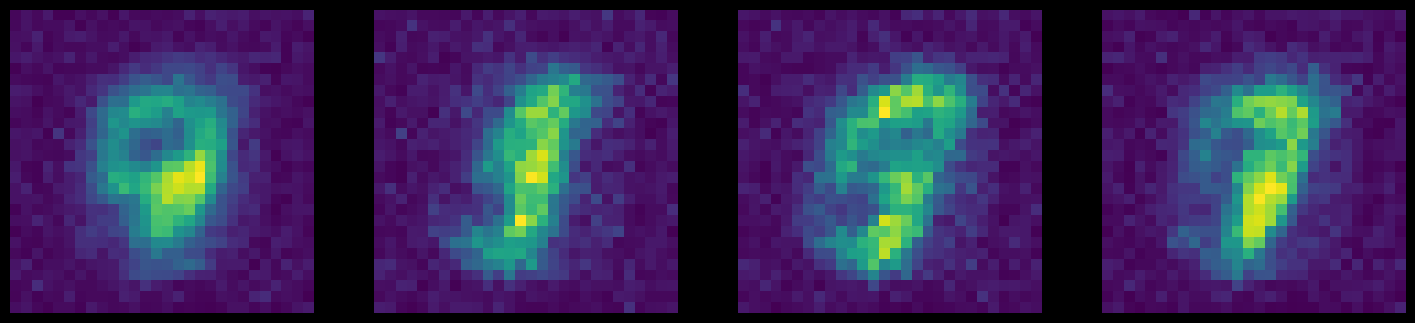

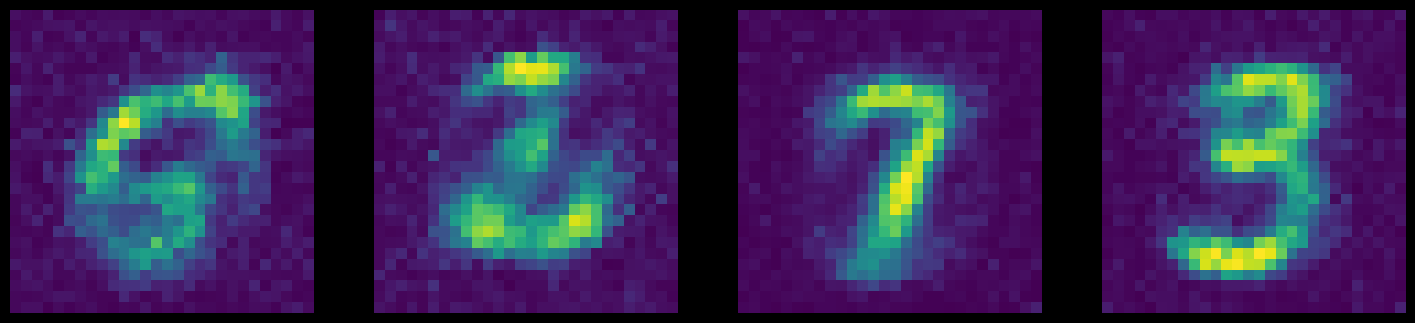

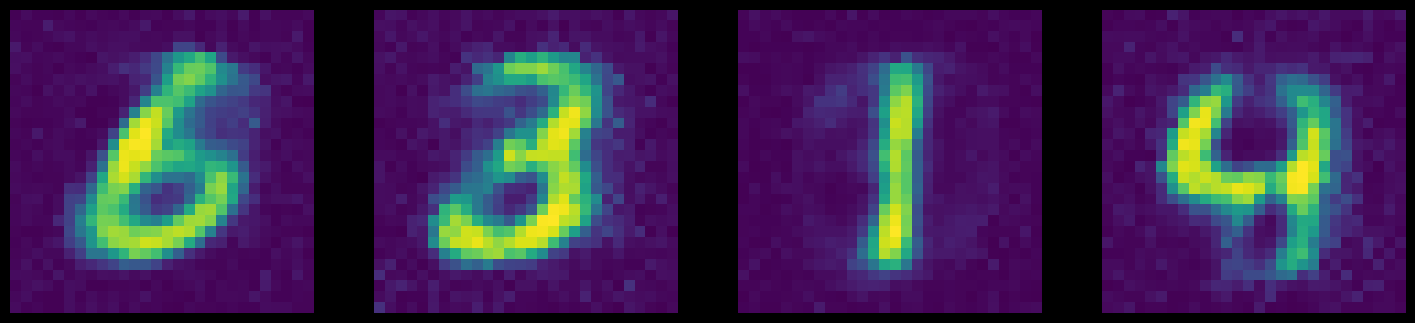

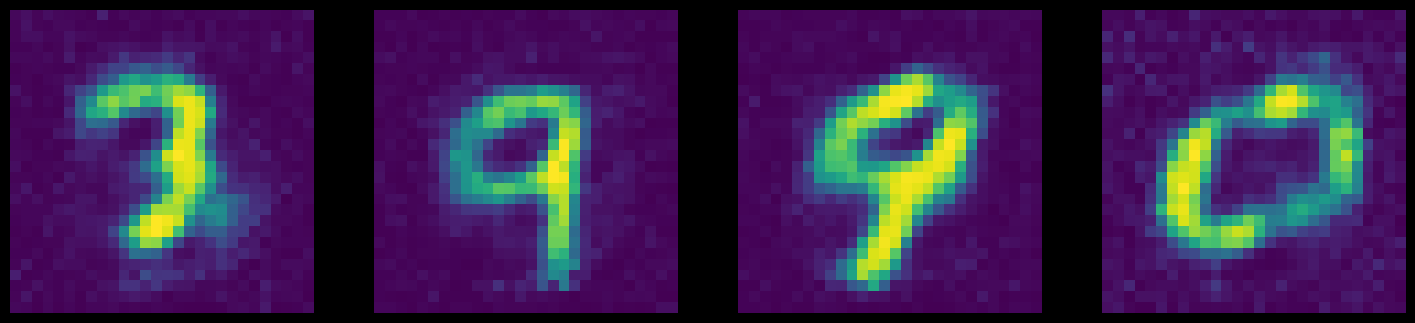

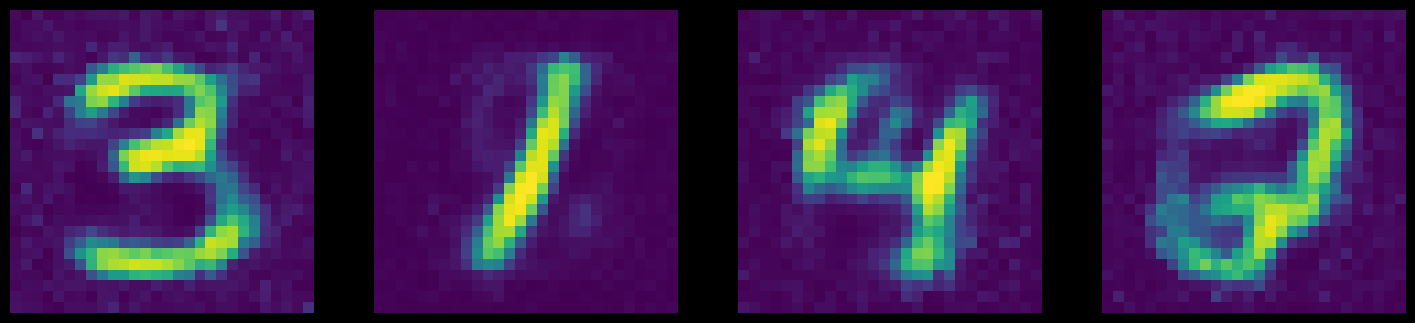

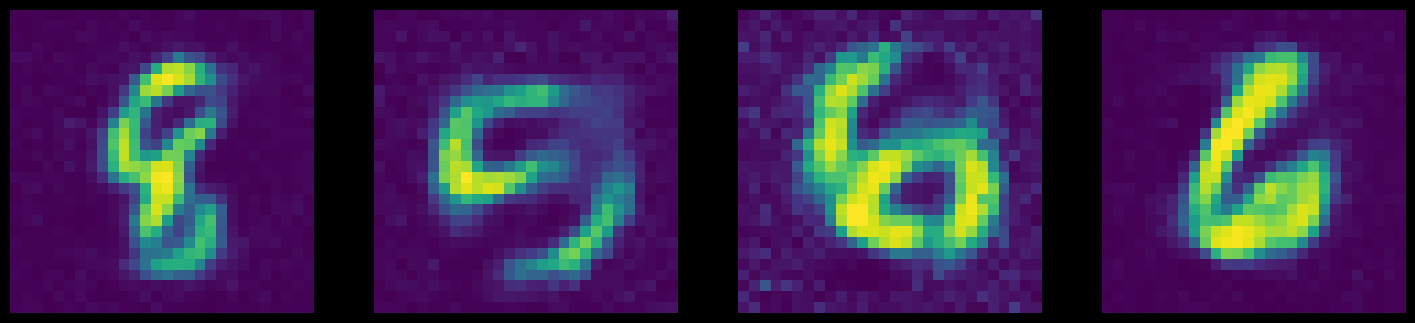

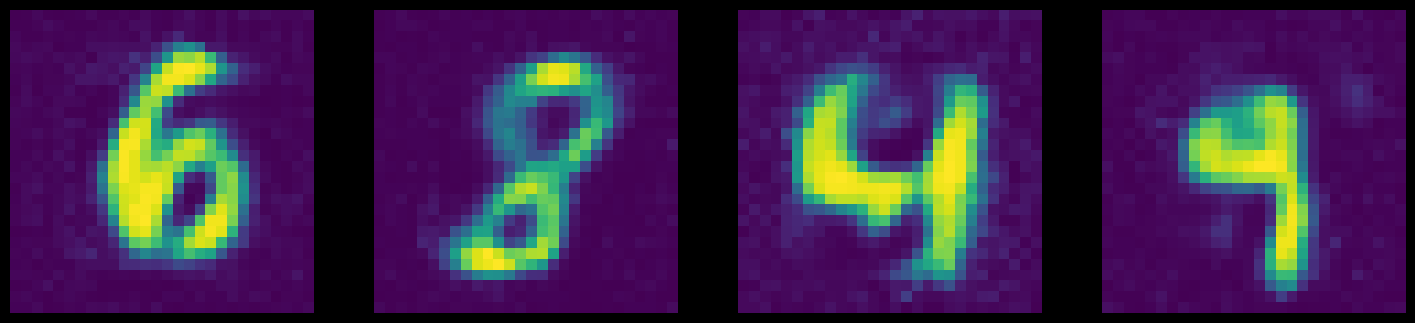

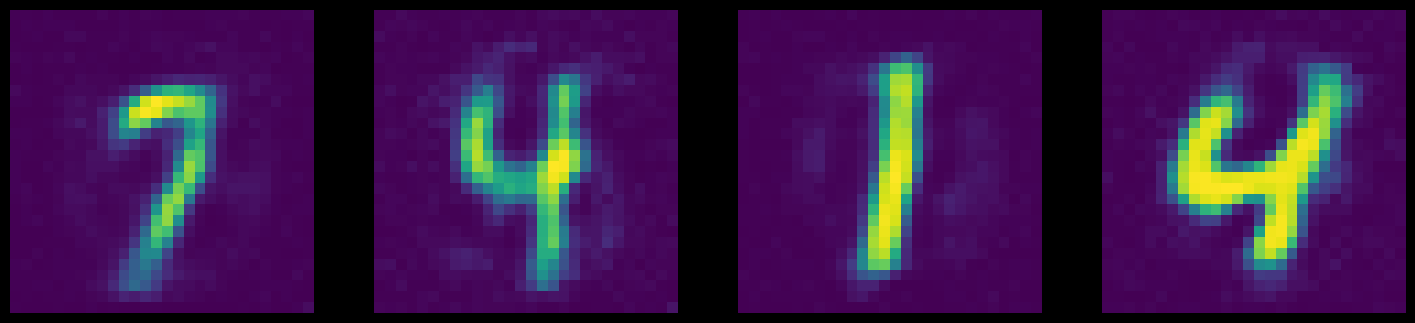

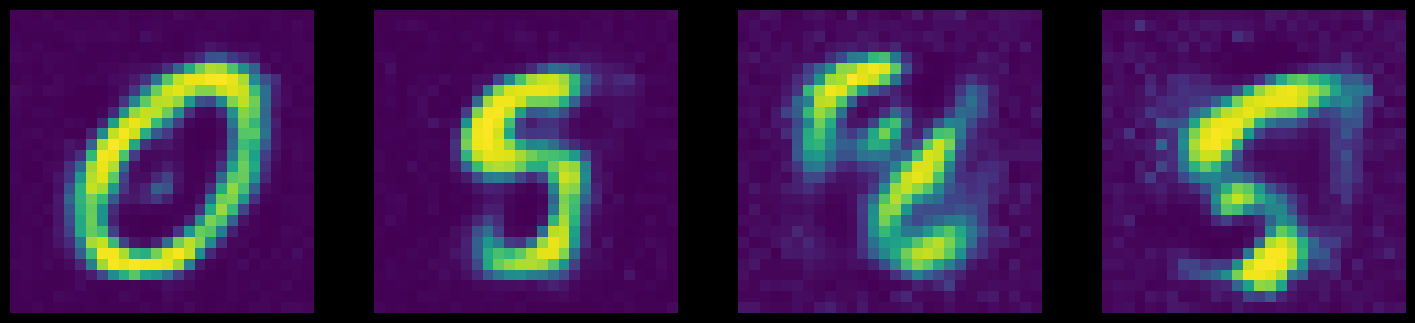

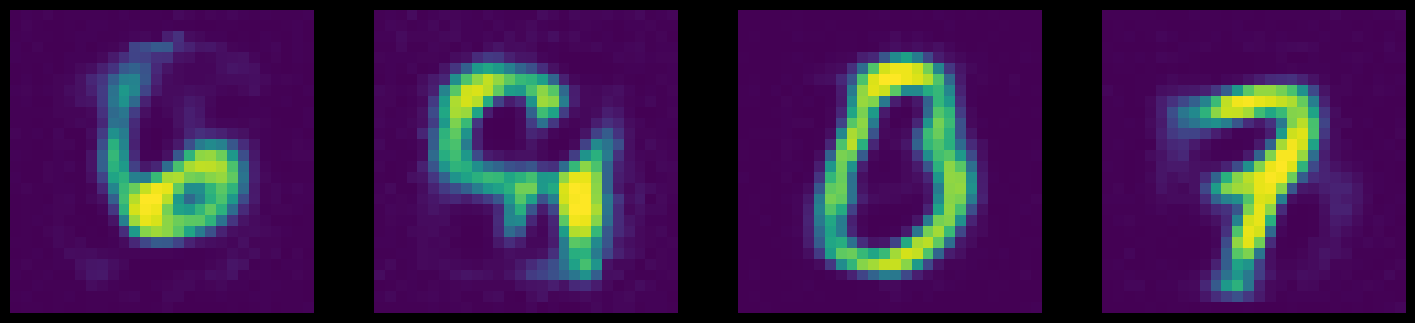

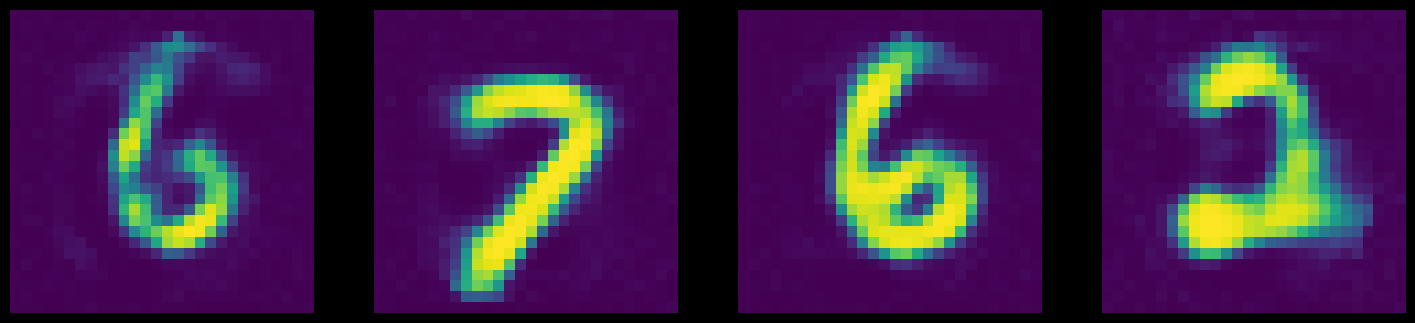

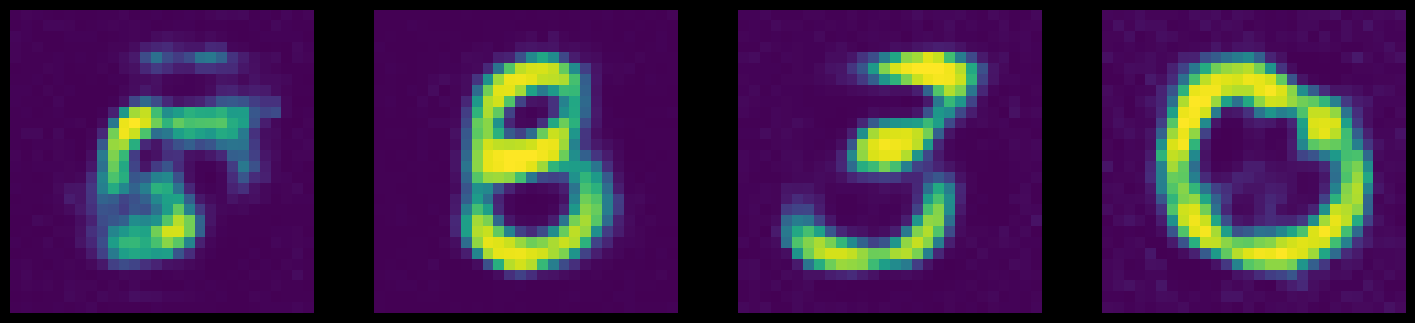

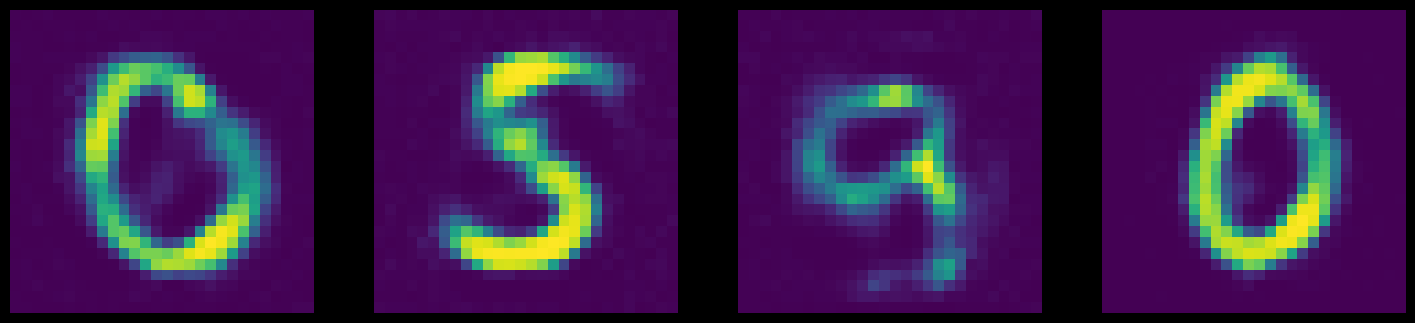

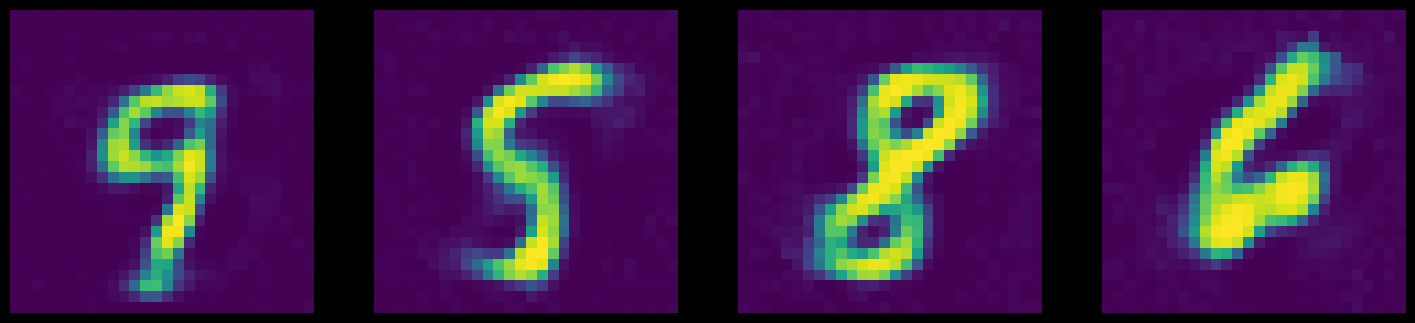

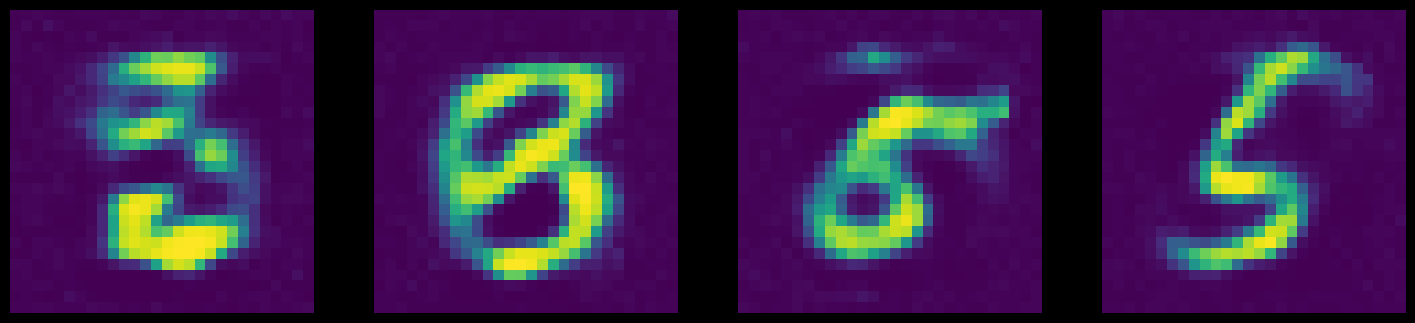

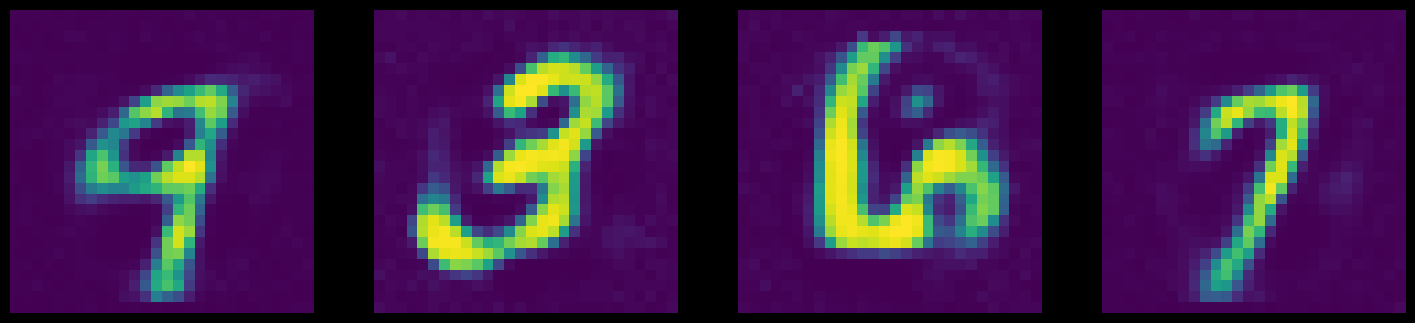

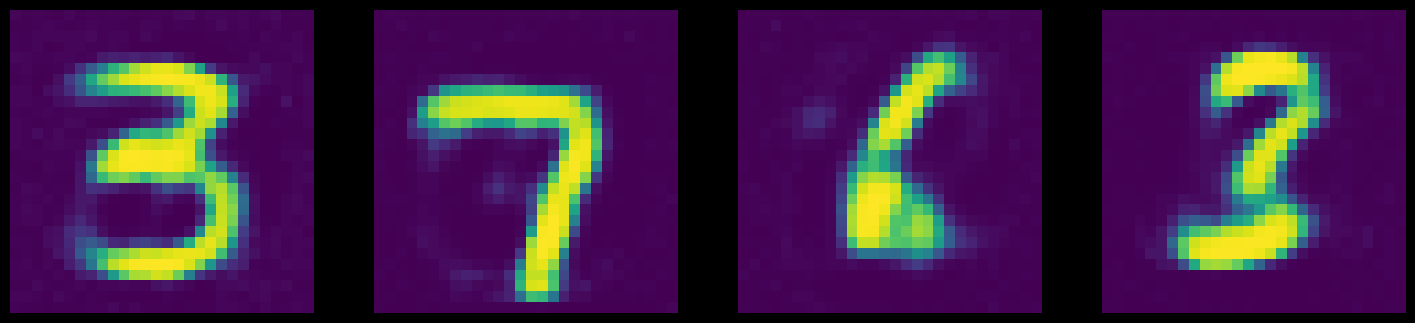

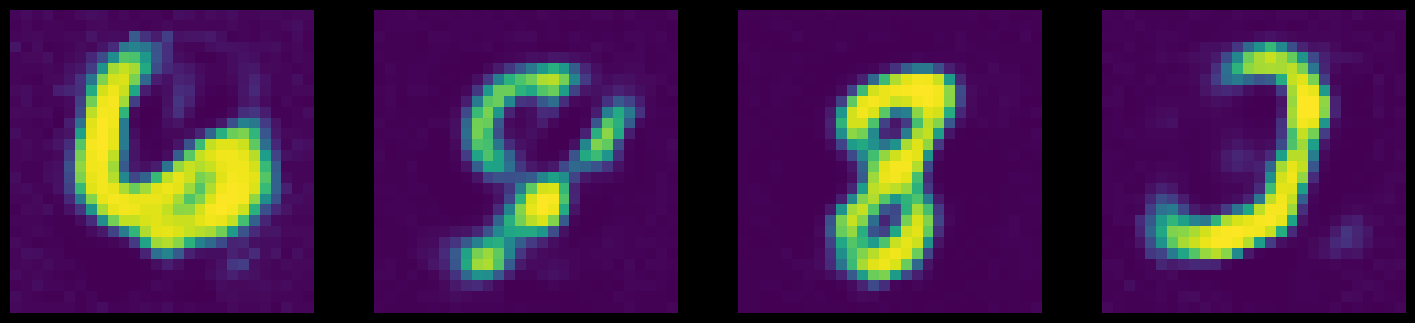

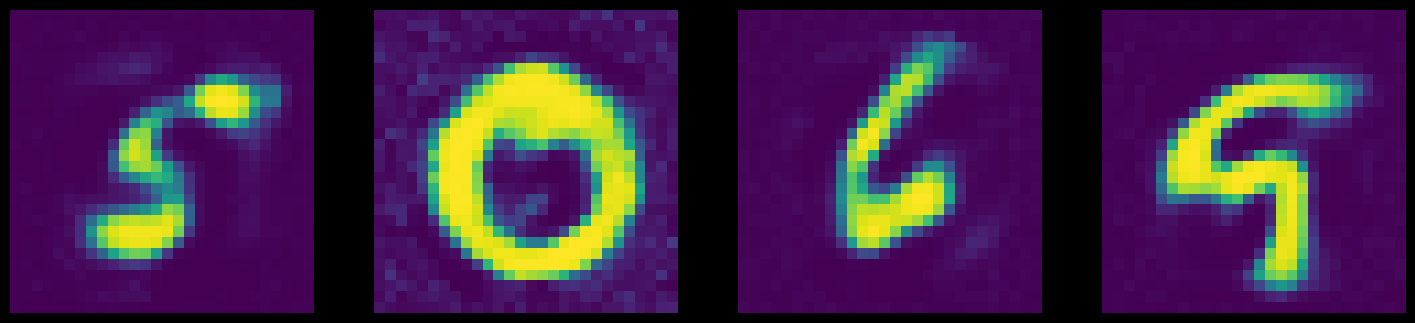

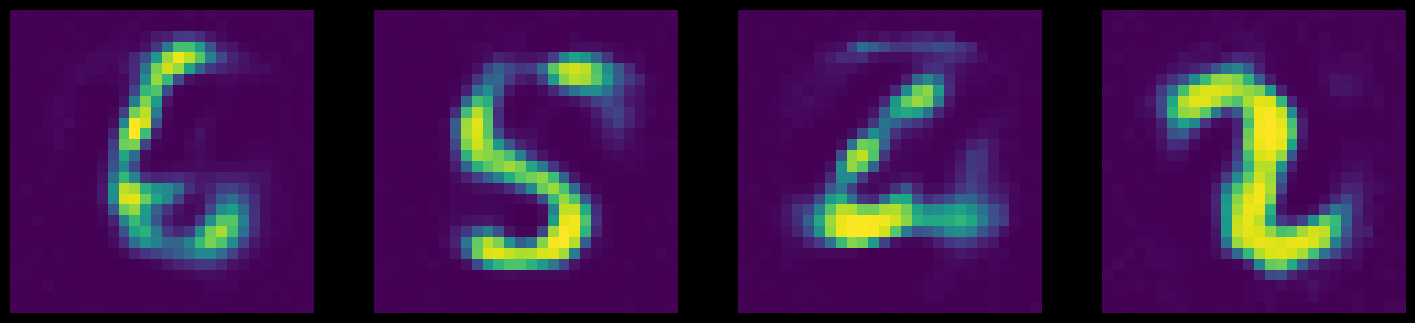

In [8]:
# Train standard or denoising autoencoder (AE)

num_epochs = 20
# do = nn.Dropout()  # comment out for standard AE
for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = img.to(device)
        img = img.view(img.size(0), -1)
        # noise = do(torch.ones(img.shape)).to(device)
        # img_bad = (img * noise).to(device)  # comment out for standard AE
        # ===================forward=====================
        output = ae(img)  # feed <img> (for std AE) or <img_bad> (for denoising AE)
        loss = criterion(output, img.data)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)  # pass (None, output) for std AE, (img_bad, output) for denoising AE

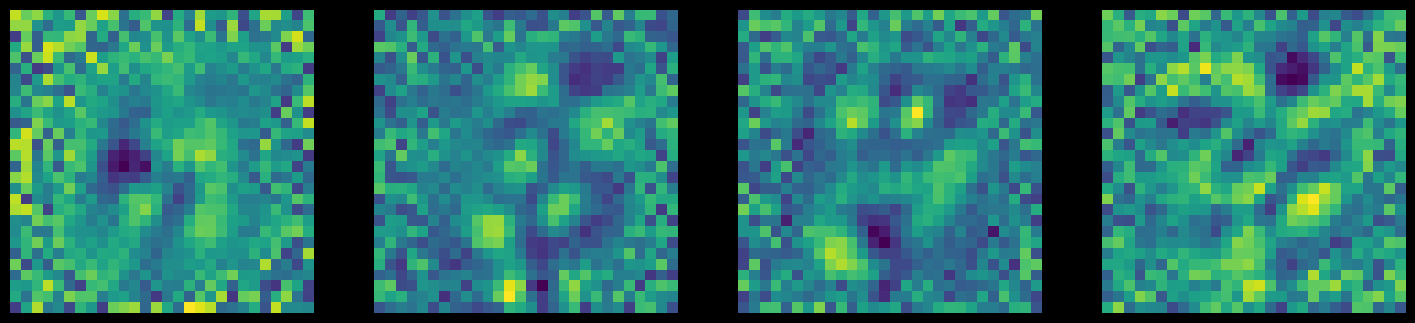

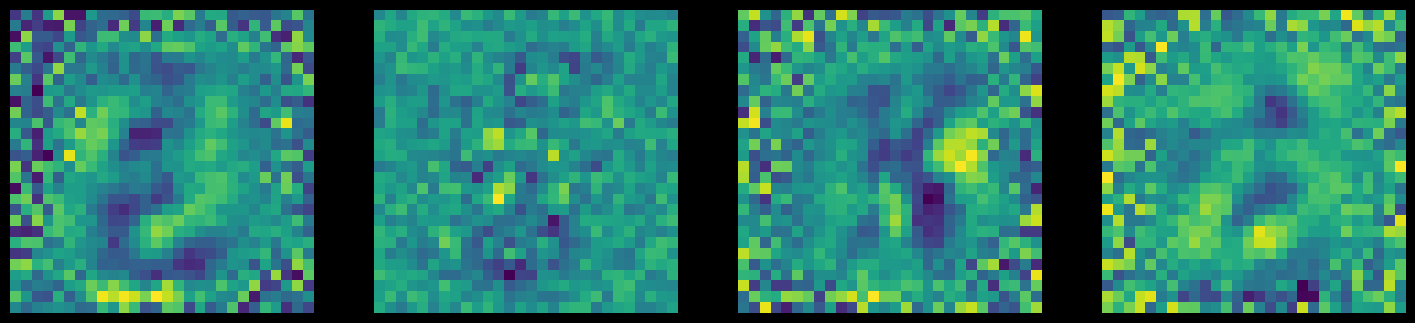

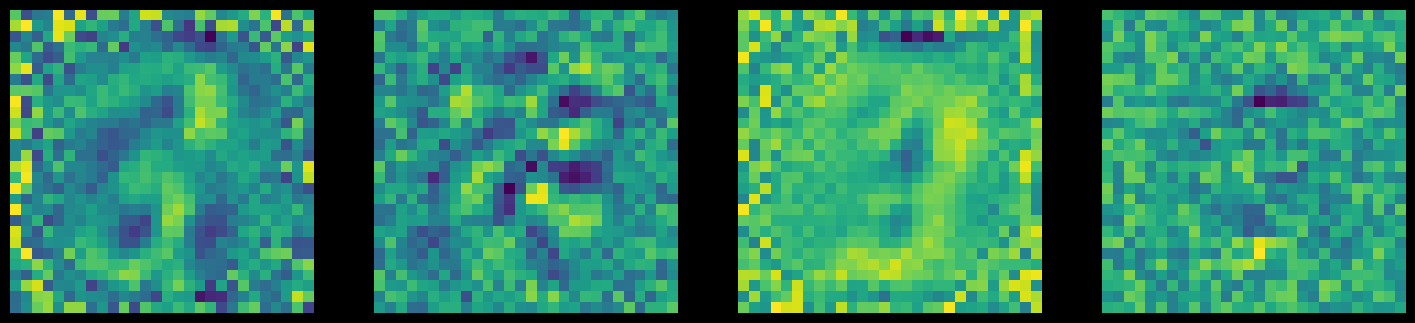

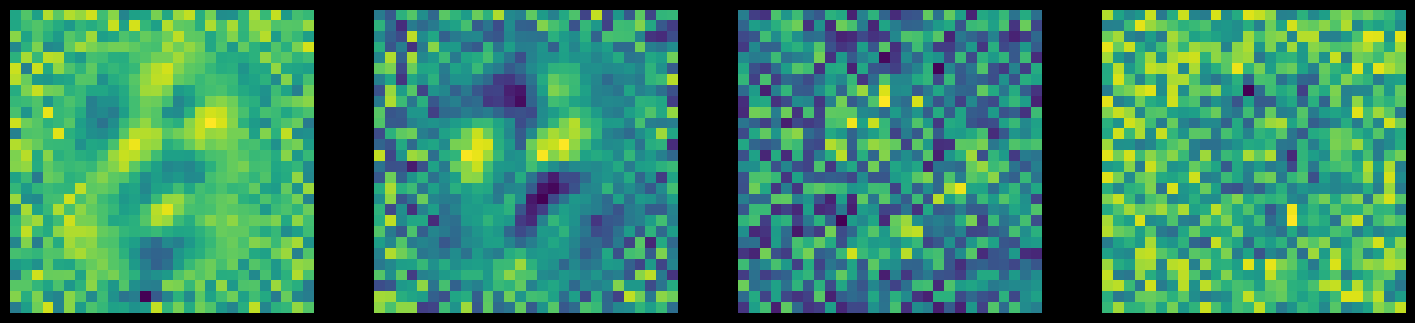

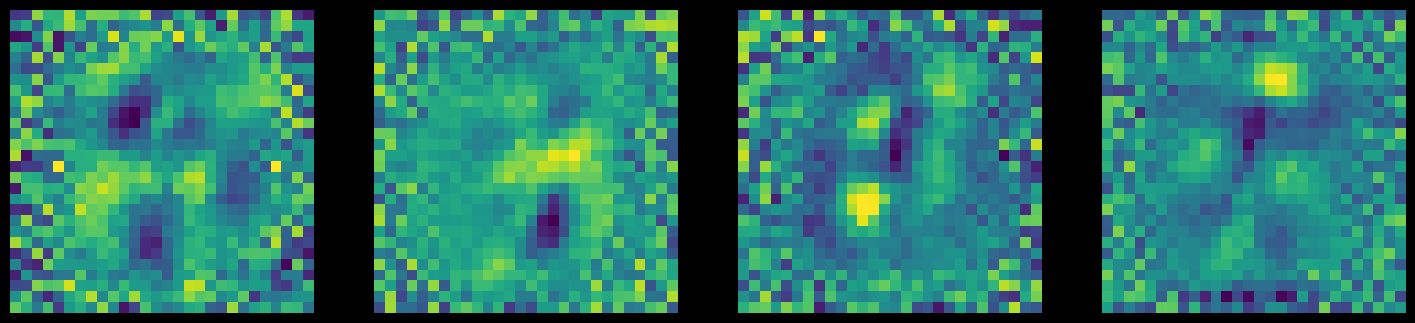

In [9]:
# Visualise a few kernels of the encoder

display_images(None, ae.encoder[0].weight, 5)

In [10]:
# Define model architecture and reconstruction loss

# n = 28 x 28 = 784
# d = 30  # for standard AE (under-complete hidden layer)
d = 500  # for denoising AE (over-complete hidden layer)

class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, d),
            nn.Tanh(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(d, 28 * 28),
            nn.Tanh(),
        )

    def forward(self, y):
        h = self.encoder(y)
        ỹ = self.decoder(h)
        return ỹ
    
model = Autoencoder().to(device)
criterion = nn.MSELoss()

In [11]:
# Configure the optimiser

learning_rate = 1e-3

optimizer = torch.optim.Adam(
    model.parameters(),
    lr=learning_rate,
)

*Comment* or *un-comment out* a few lines of code to seamlessly switch between *standard AE* and *denoising one*.

Don't forget to **(1)** change the size of the hidden layer accordingly, **(2)** re-generate the model, and **(3)** re-pass the parameters to the optimiser.

epoch [1/20], loss:0.0776
epoch [2/20], loss:0.0552
epoch [3/20], loss:0.0533
epoch [4/20], loss:0.0505
epoch [5/20], loss:0.0483
epoch [6/20], loss:0.0483
epoch [7/20], loss:0.0498
epoch [8/20], loss:0.0452
epoch [9/20], loss:0.0464
epoch [10/20], loss:0.0484
epoch [11/20], loss:0.0451


C:\Users\Samue\AppData\Local\Temp\ipykernel_30612\156713442.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(18, 6))


epoch [12/20], loss:0.0415
epoch [13/20], loss:0.0449
epoch [14/20], loss:0.0408
epoch [15/20], loss:0.0437
epoch [16/20], loss:0.0409
epoch [17/20], loss:0.0385
epoch [18/20], loss:0.0399
epoch [19/20], loss:0.0394
epoch [20/20], loss:0.0425


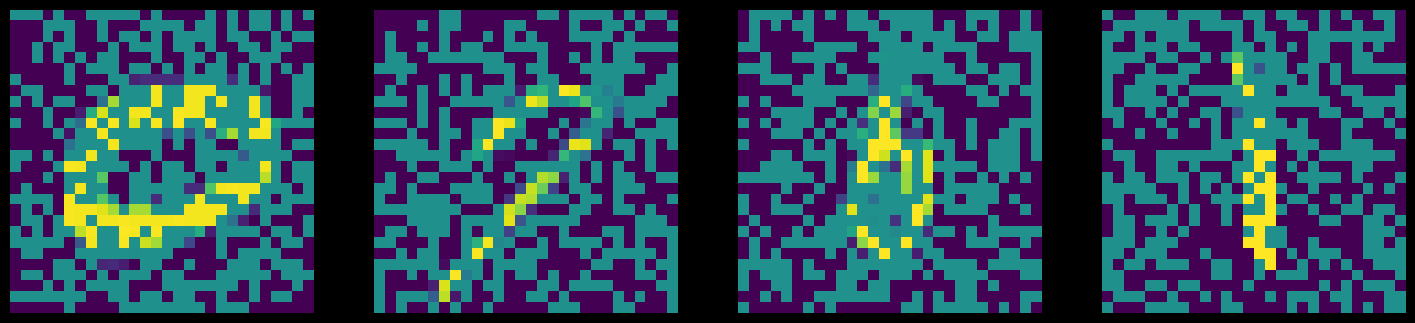

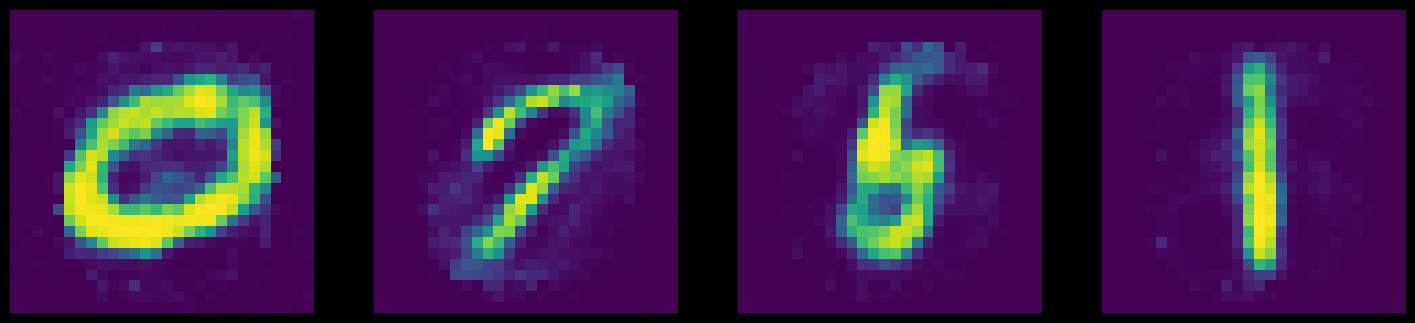

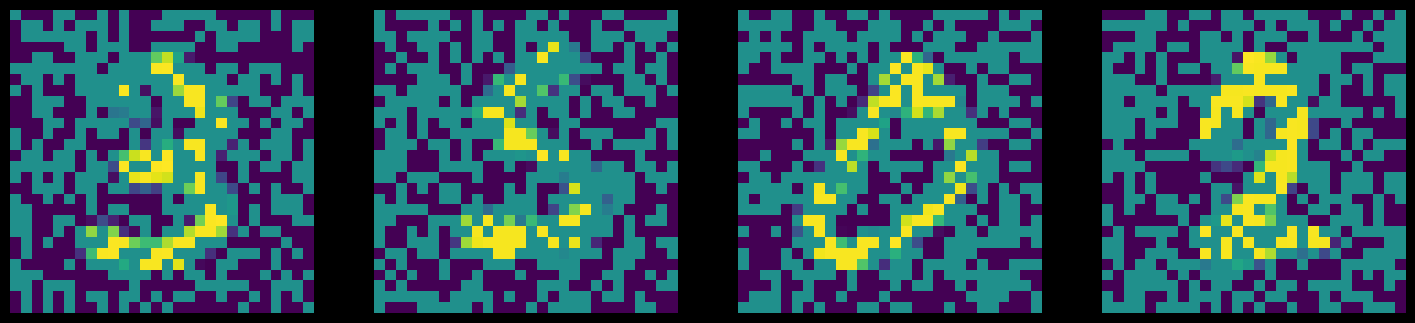

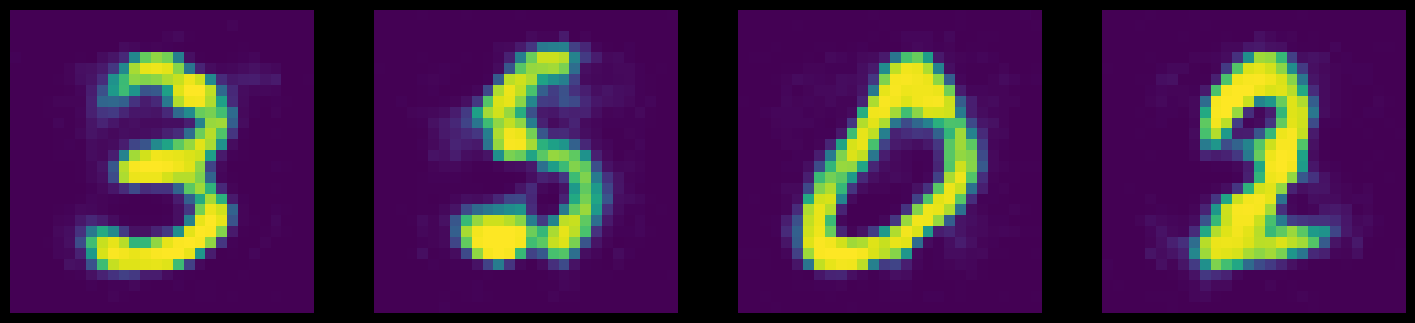

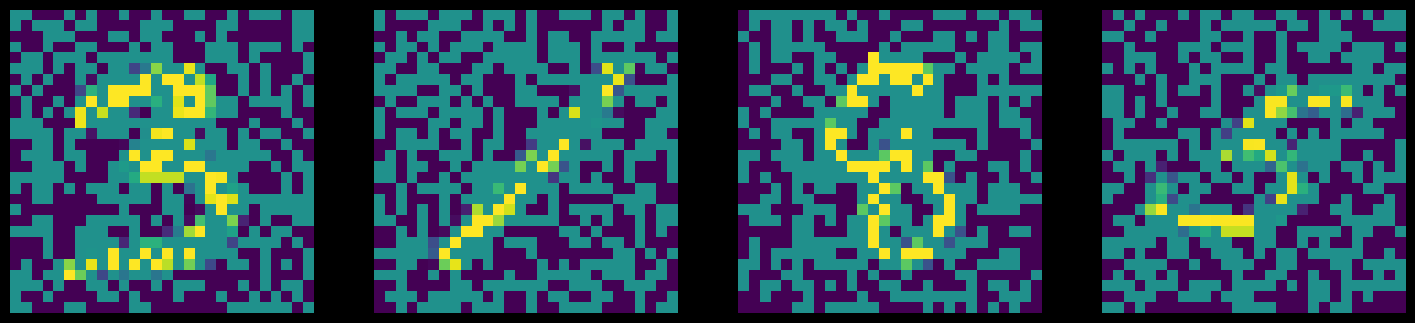

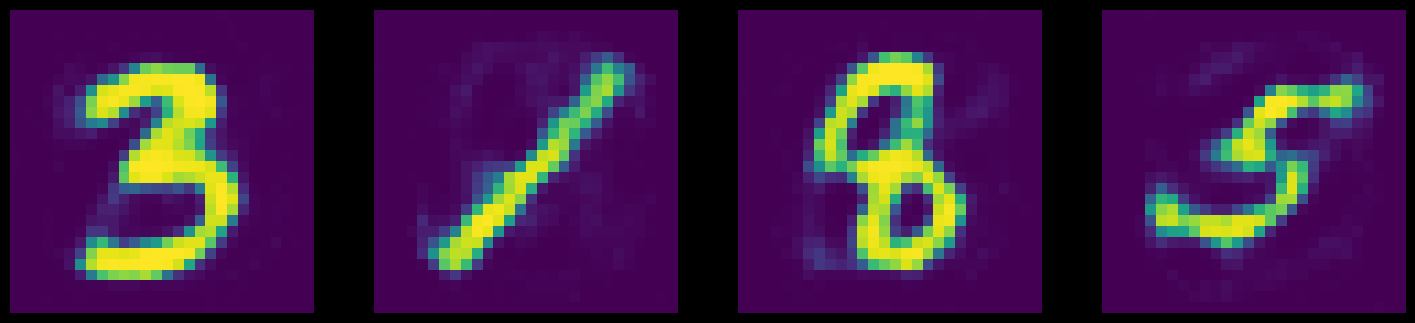

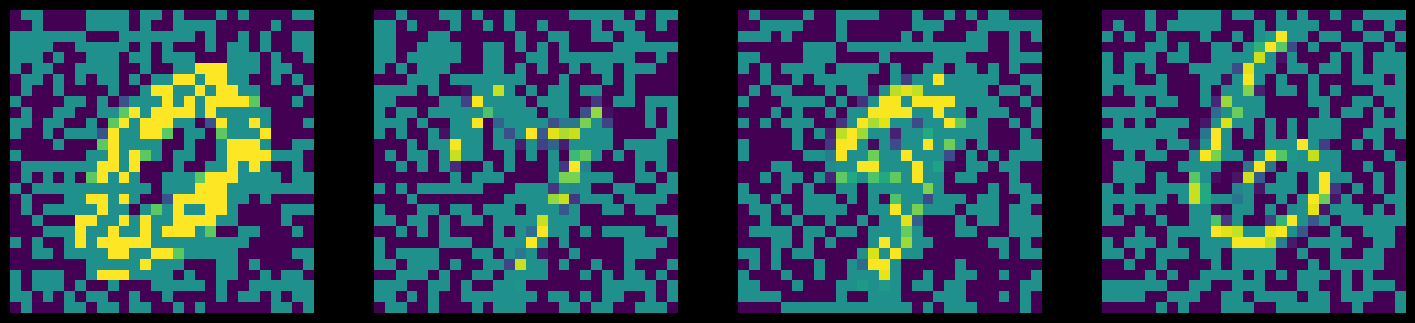

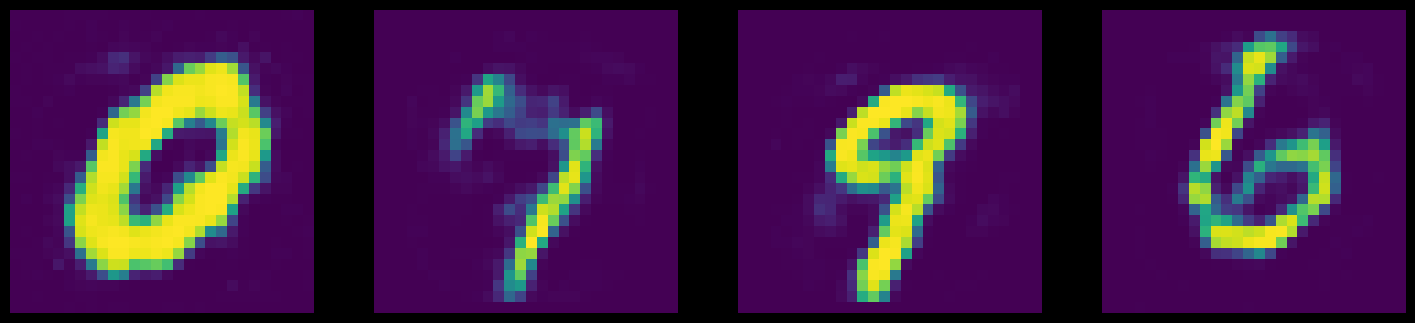

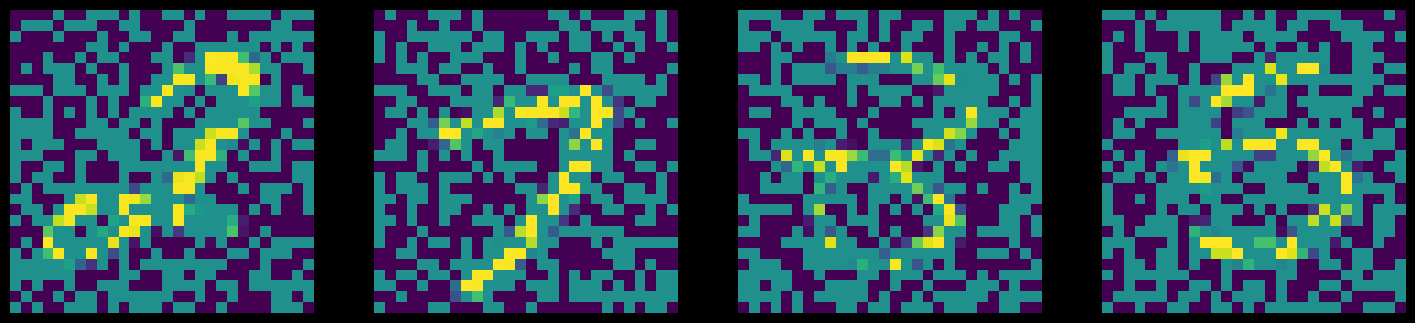

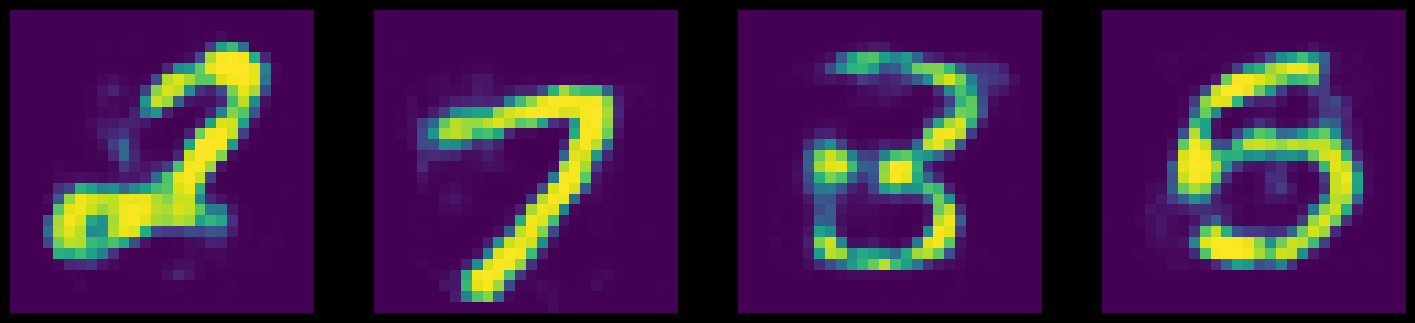

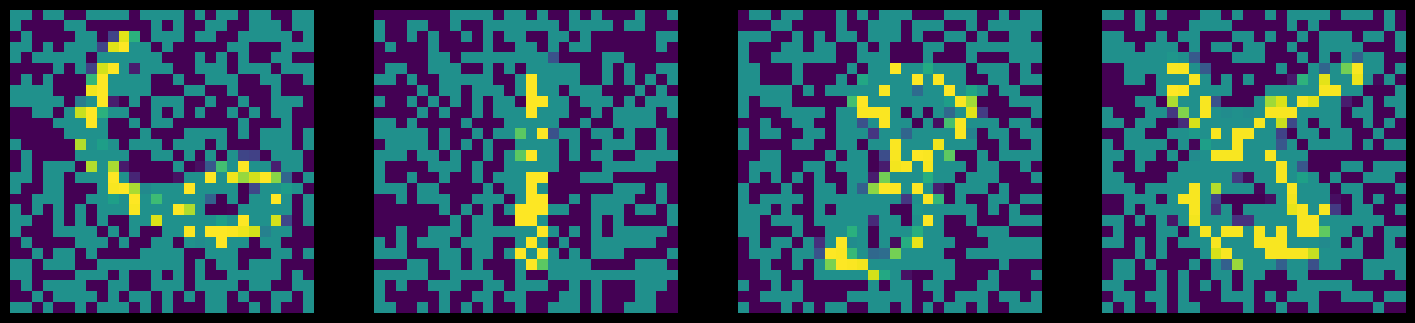

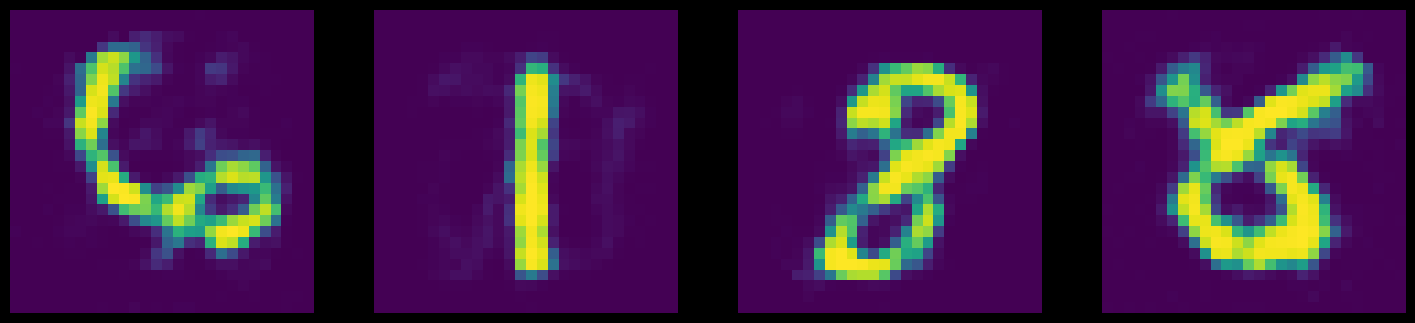

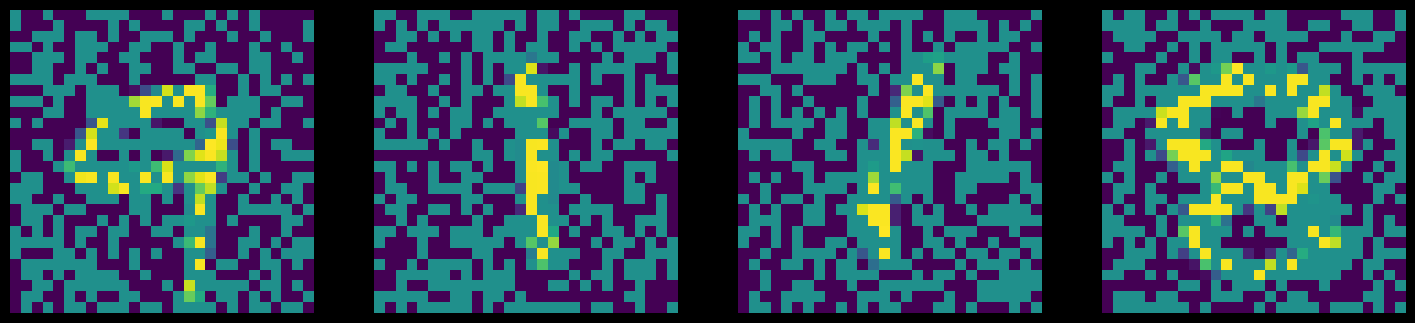

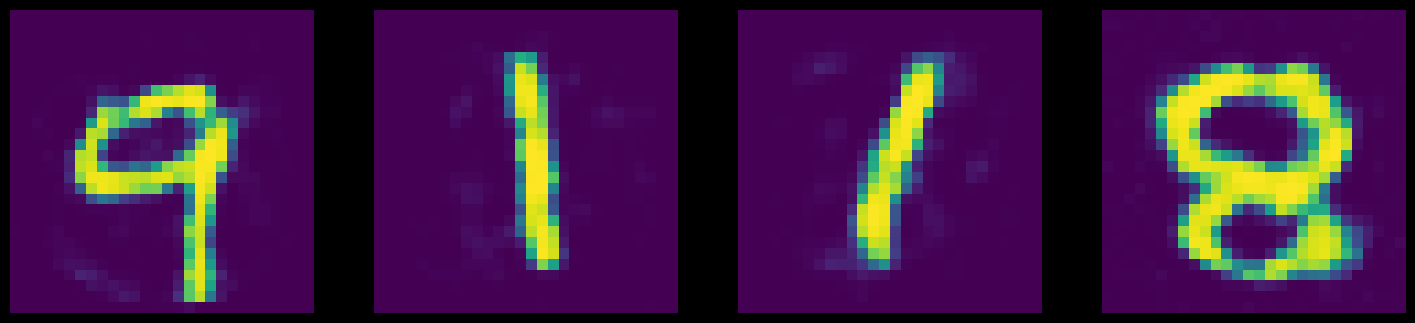

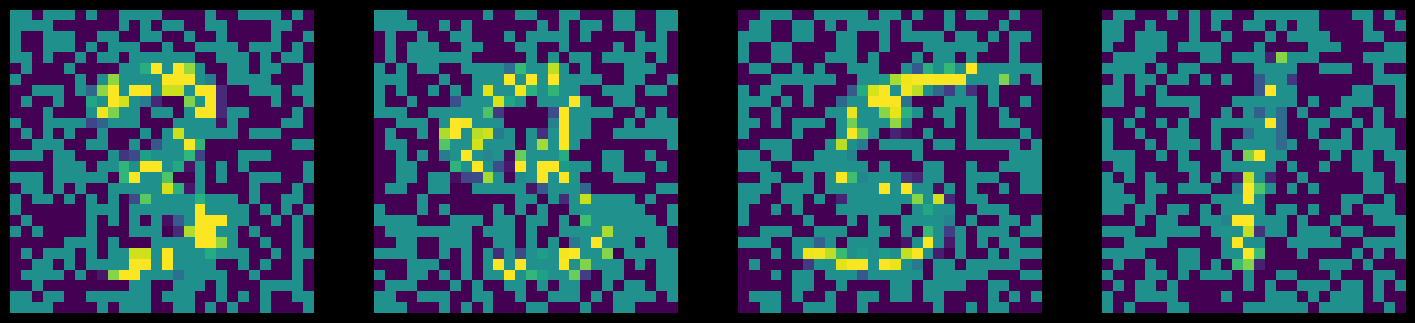

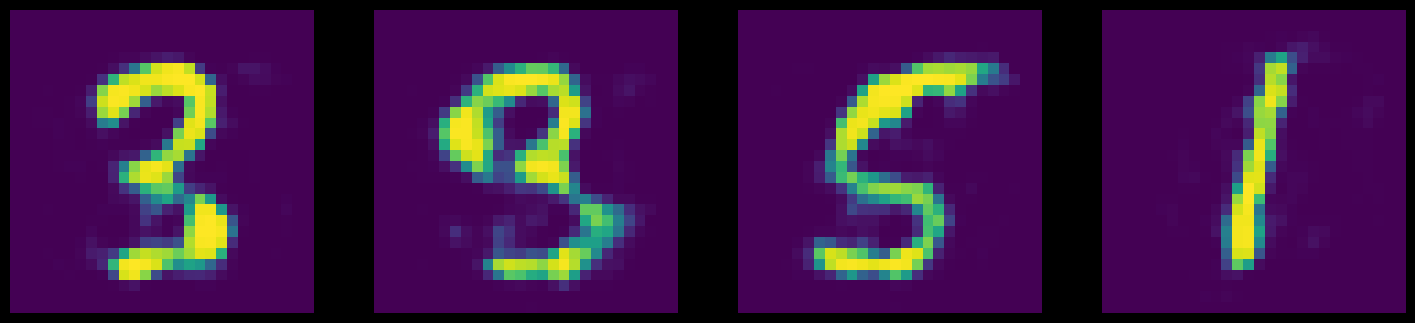

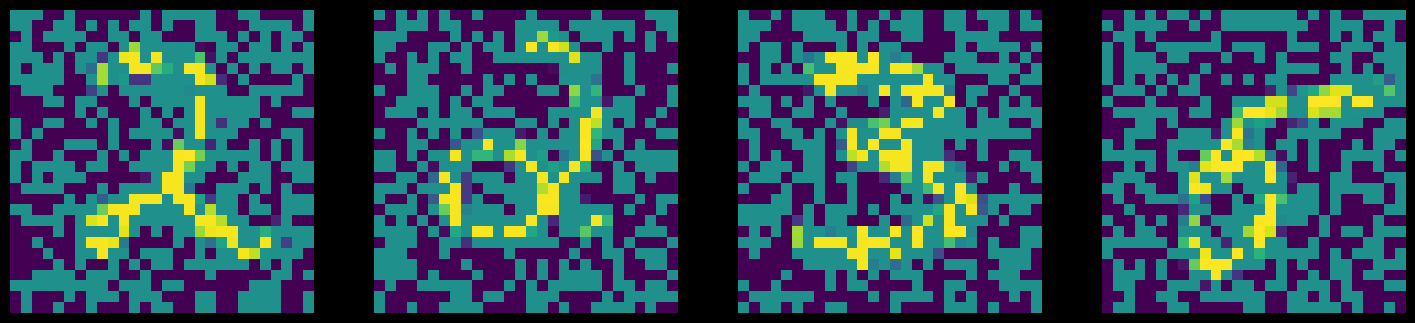

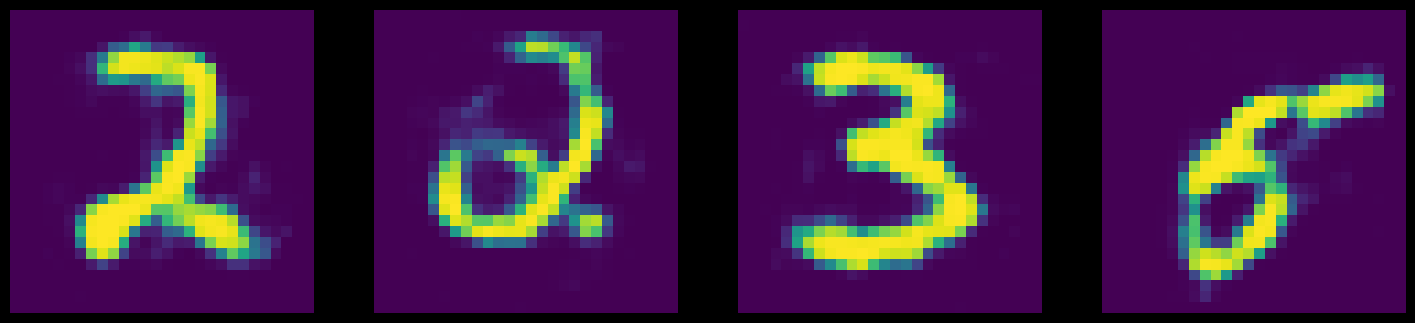

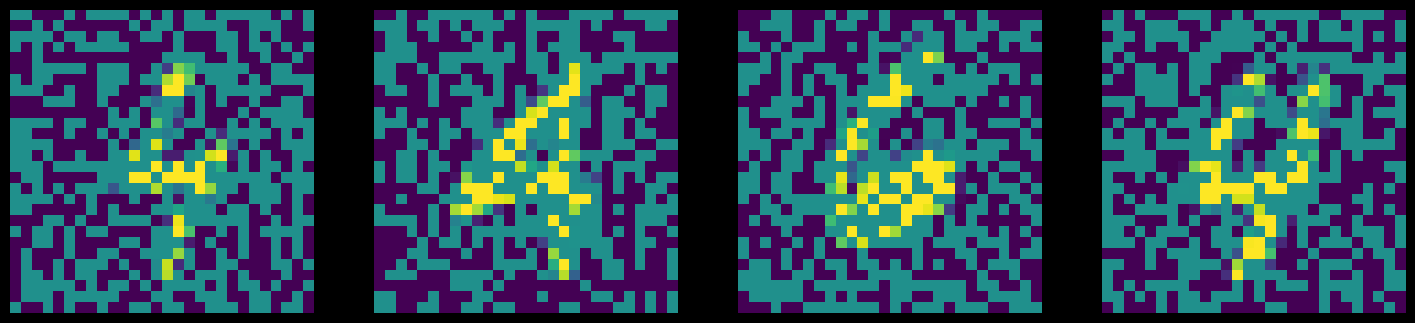

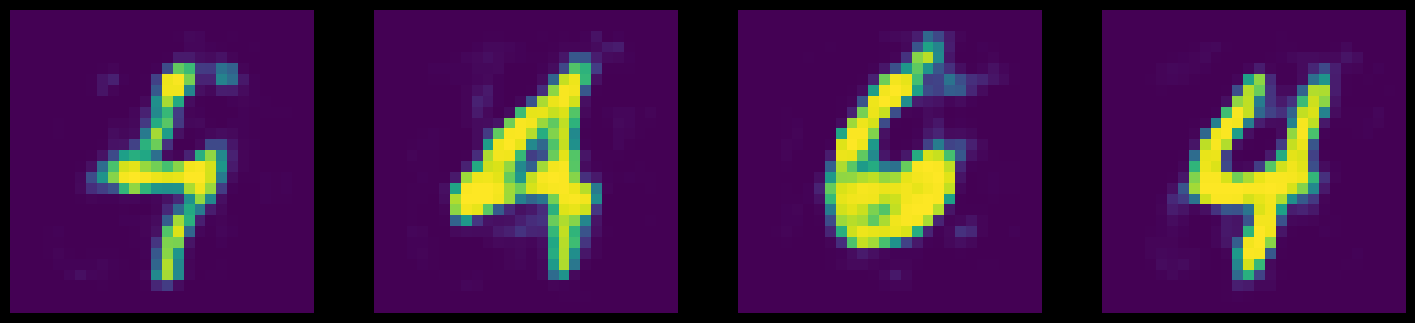

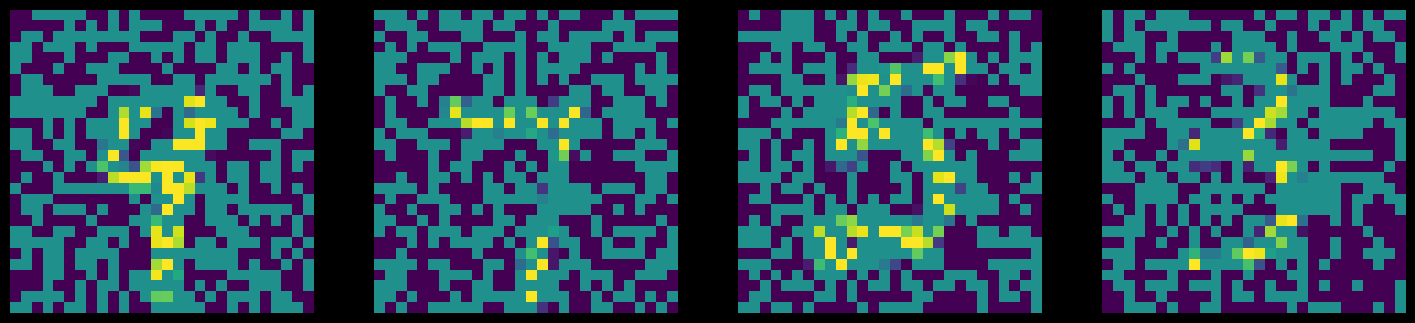

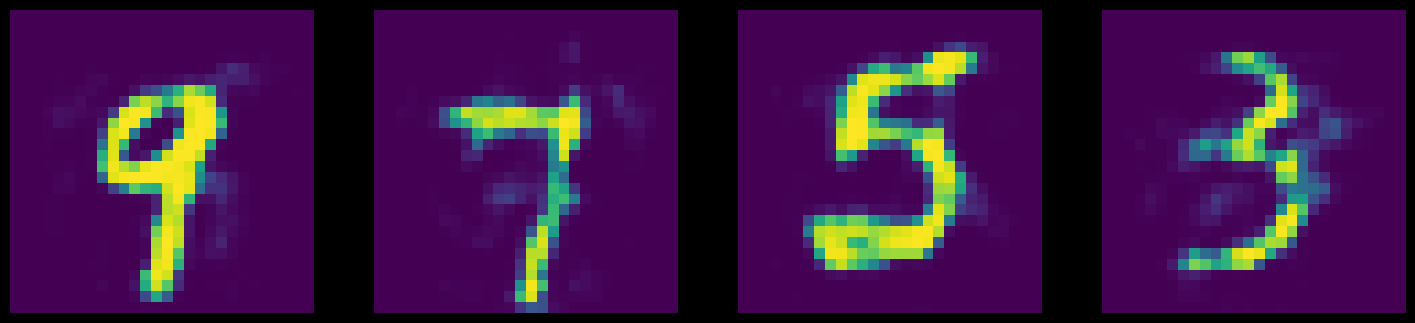

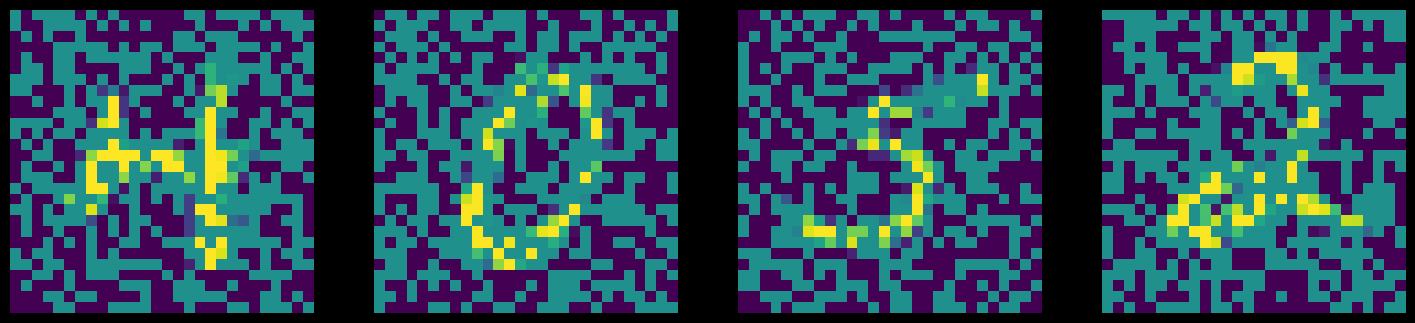

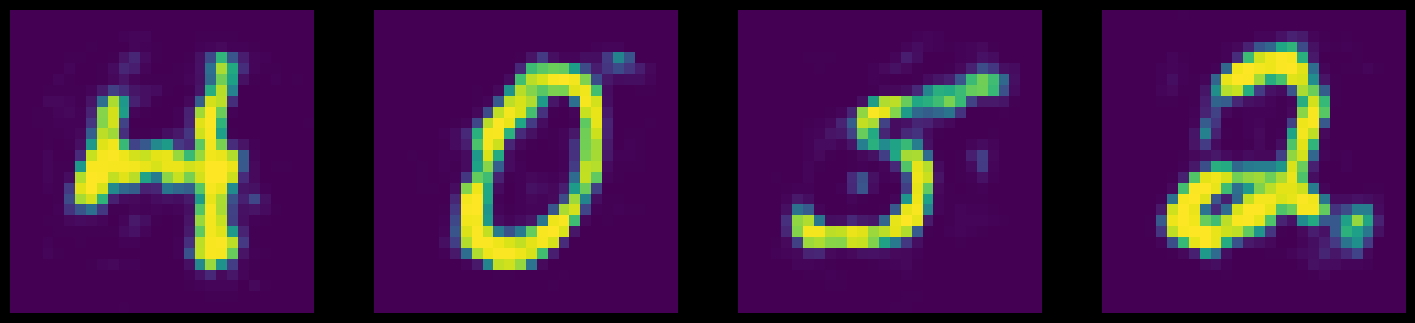

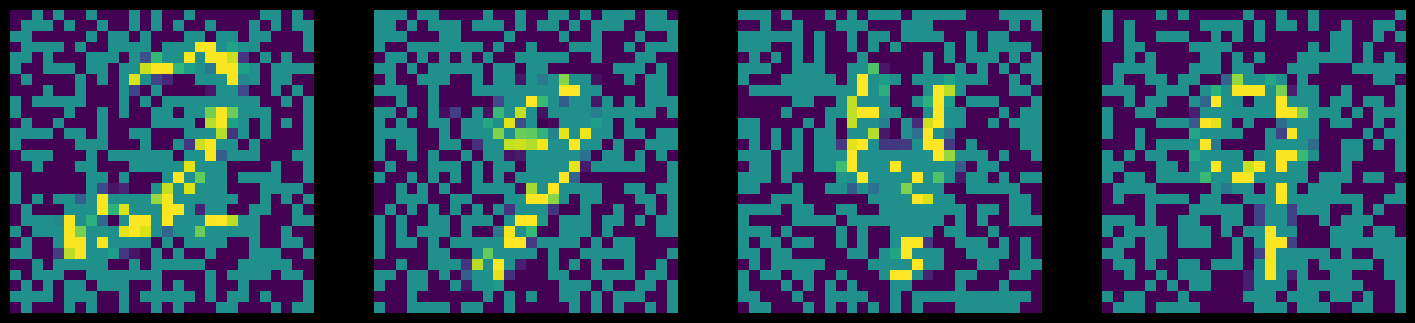

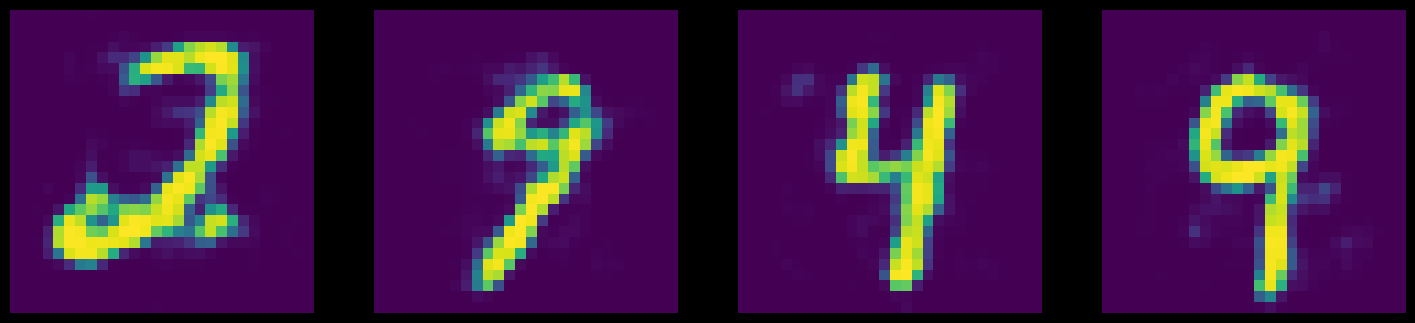

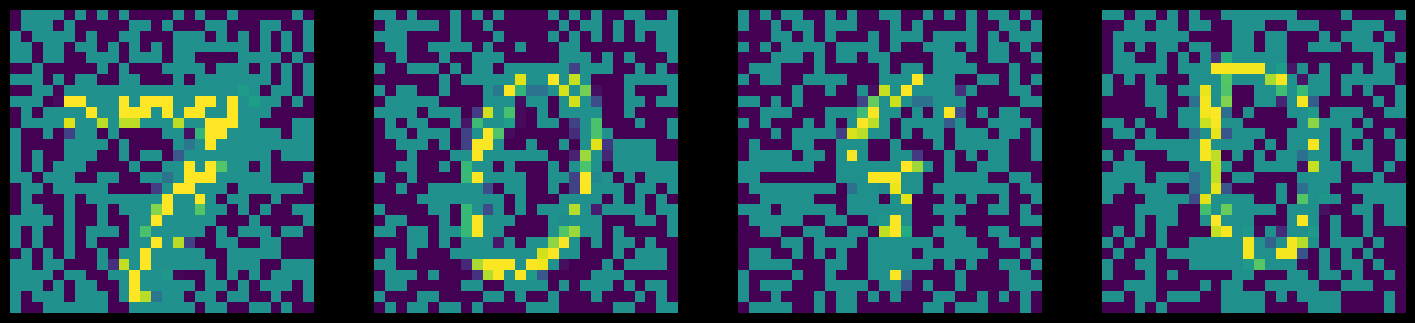

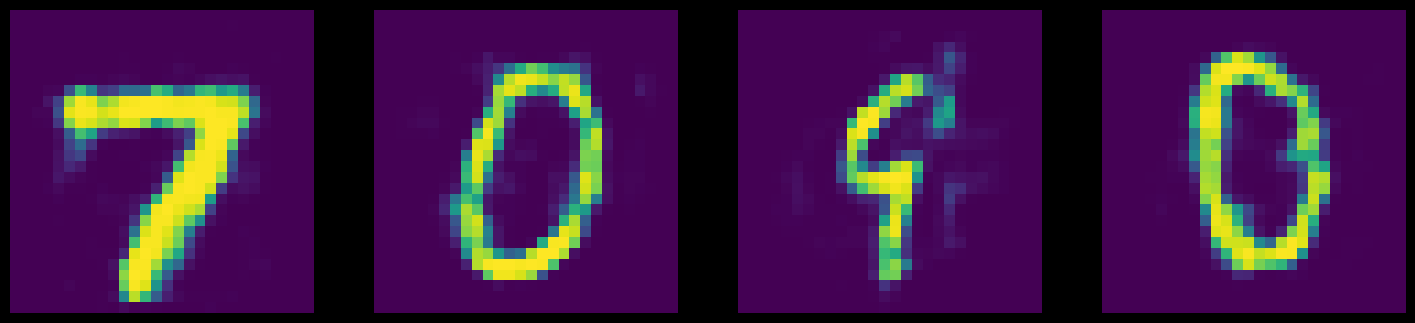

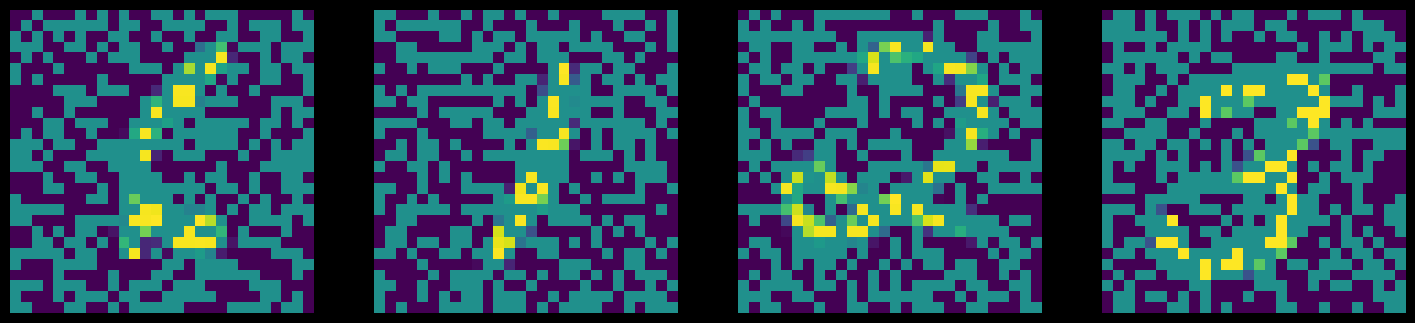

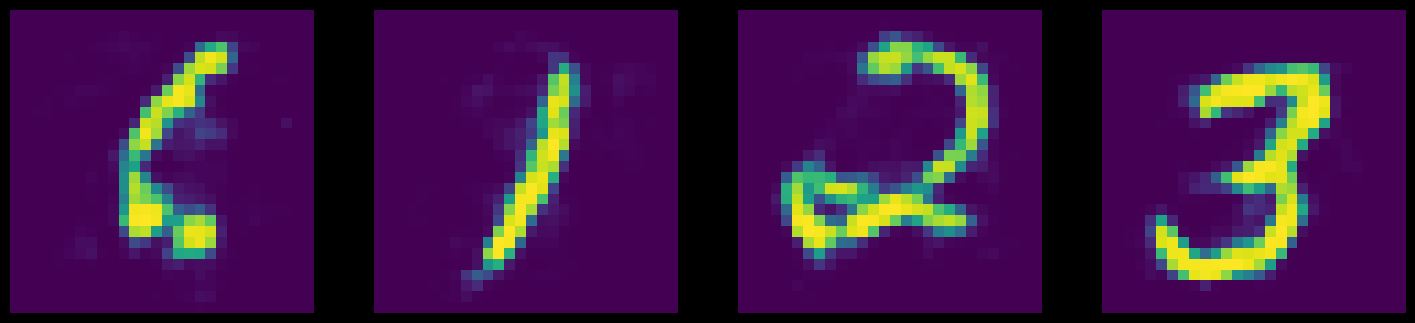

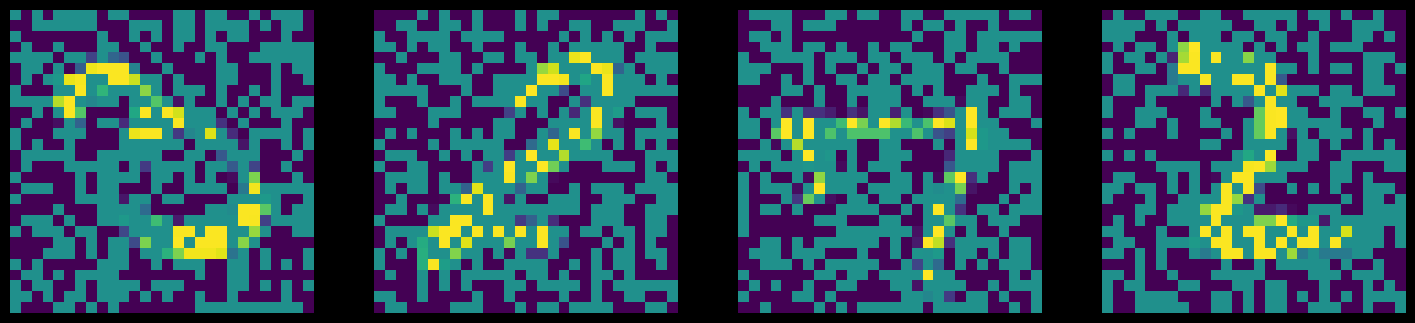

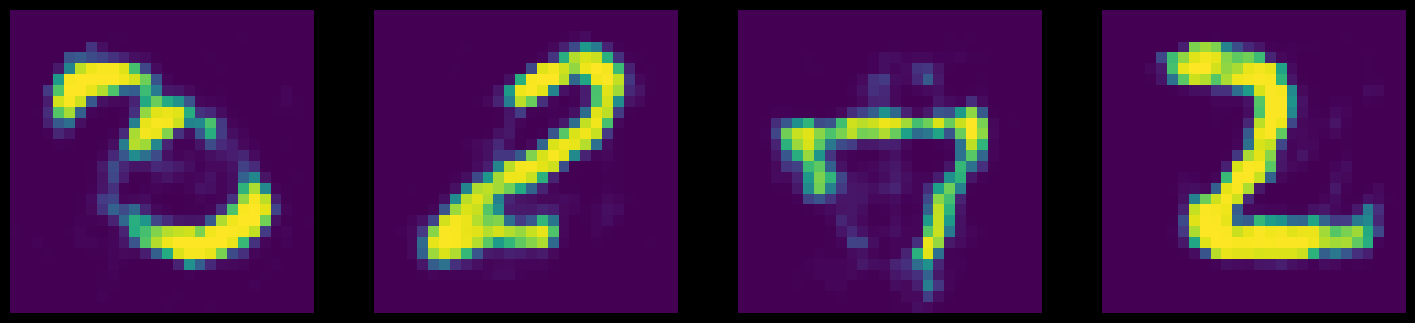

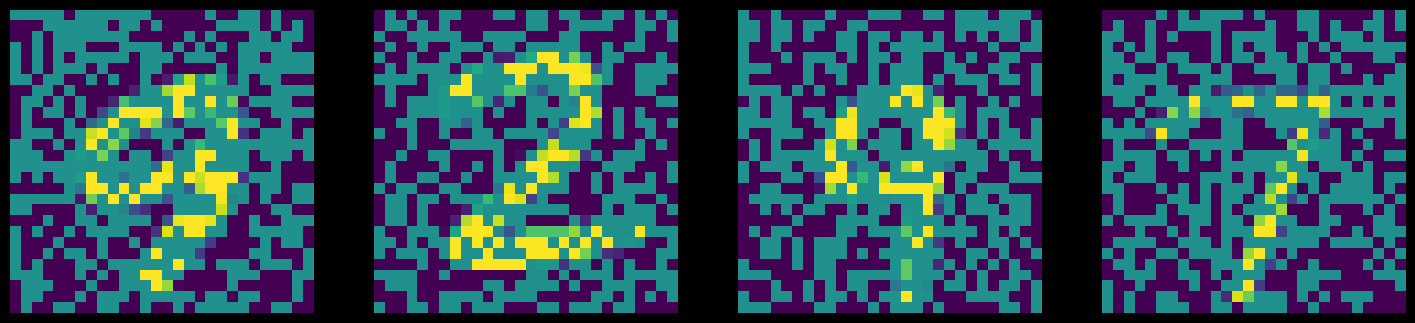

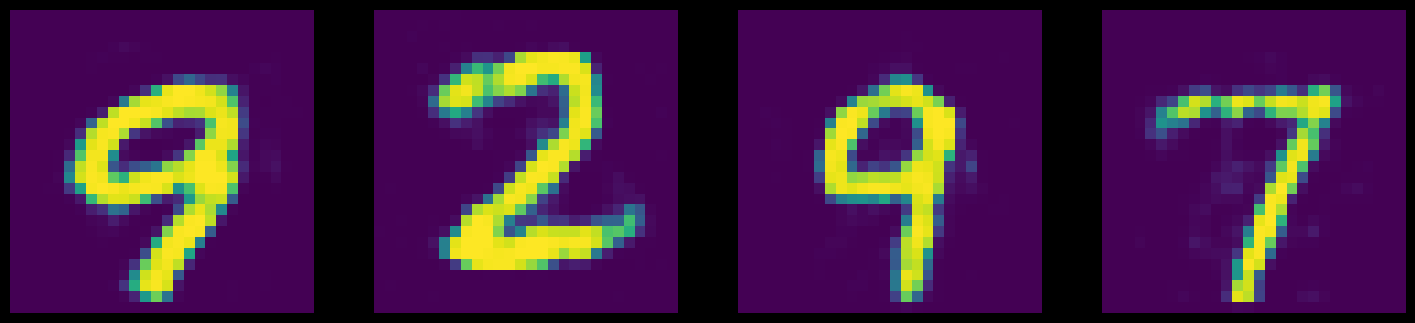

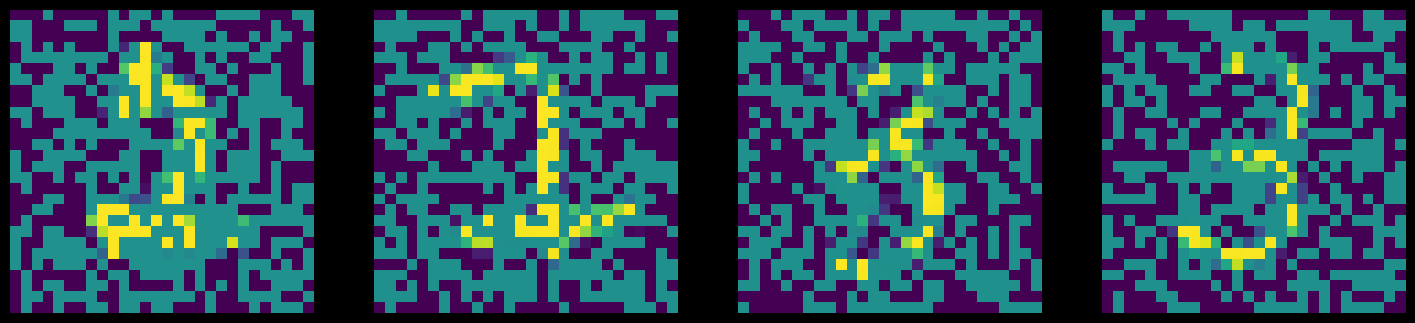

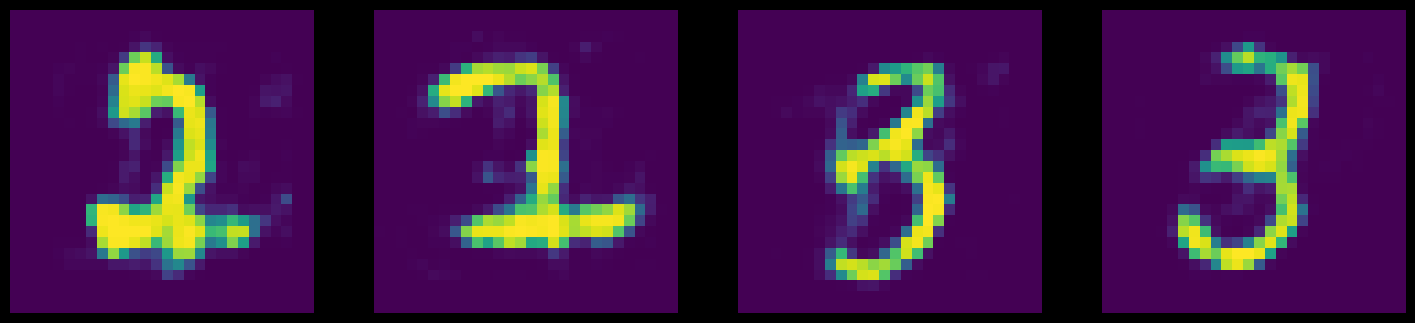

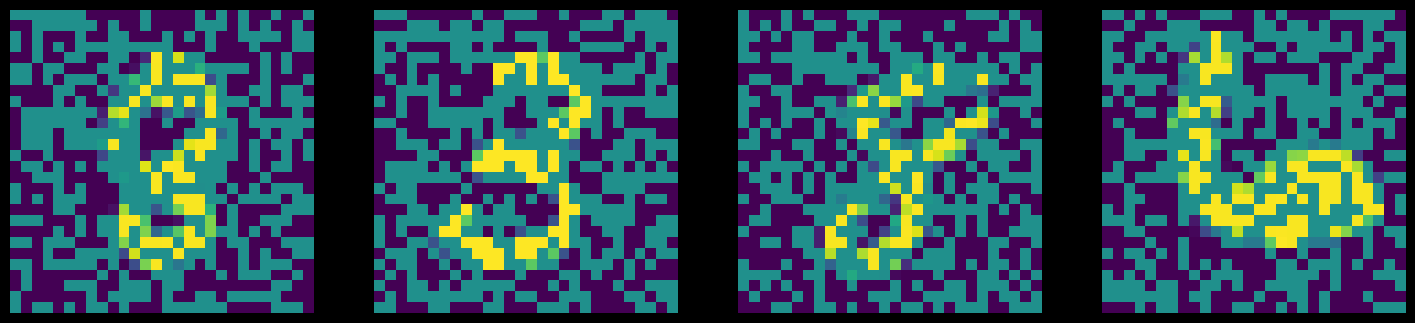

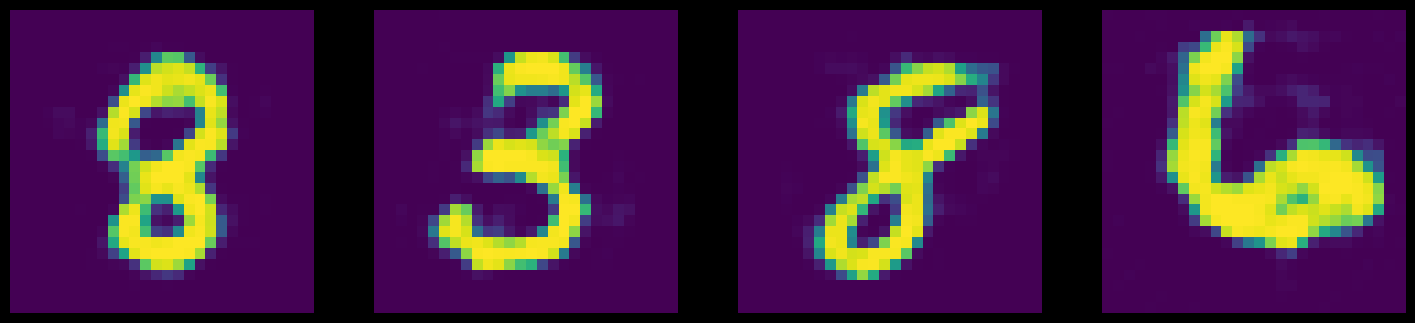

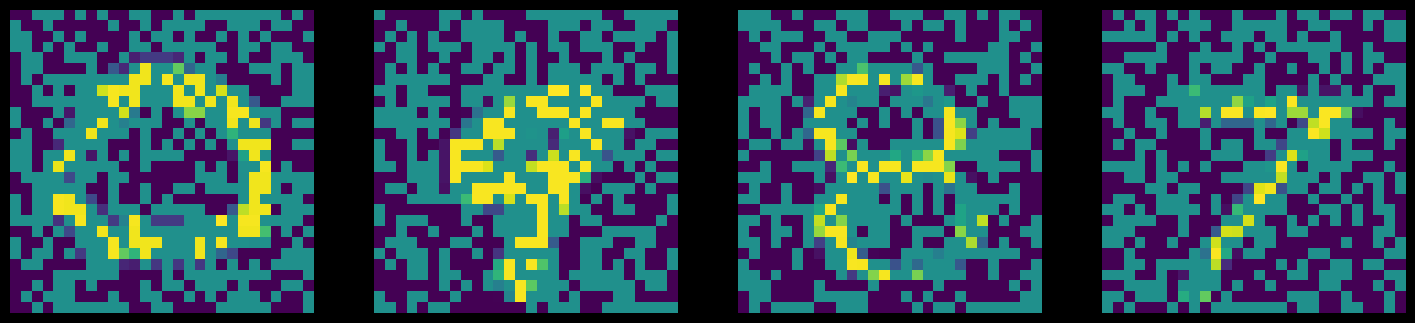

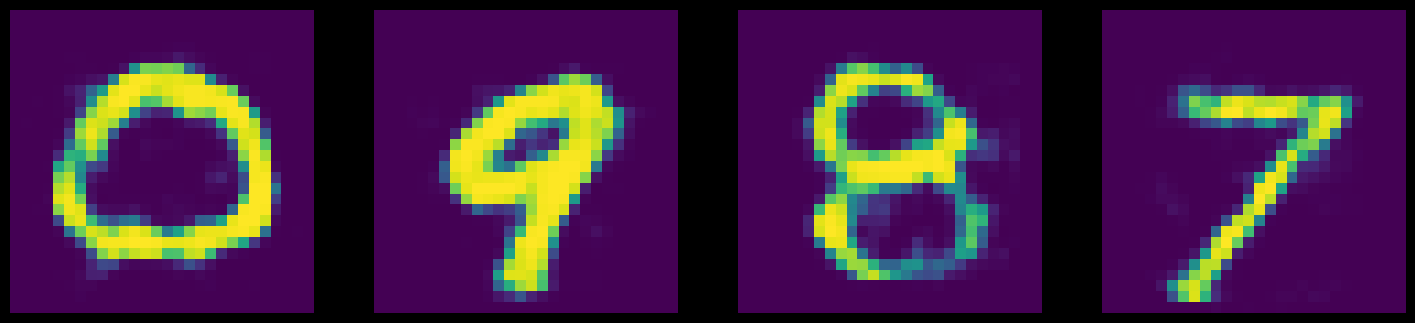

In [12]:
# Train standard or denoising autoencoder (AE)

num_epochs = 20
do = nn.Dropout()  # comment out for standard AE
for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = img.to(device)
        img = img.view(img.size(0), -1)
        noise = do(torch.ones(img.shape)).to(device)
        img_bad = (img * noise).to(device)  # comment out for standard AE
        # ===================forward=====================
        output = model(img_bad)  # feed <img> (for std AE) or <img_bad> (for denoising AE)
        loss = criterion(output, img.data)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(img_bad, output)  # pass (None, output) for std AE, (img_bad, output) for denoising AE

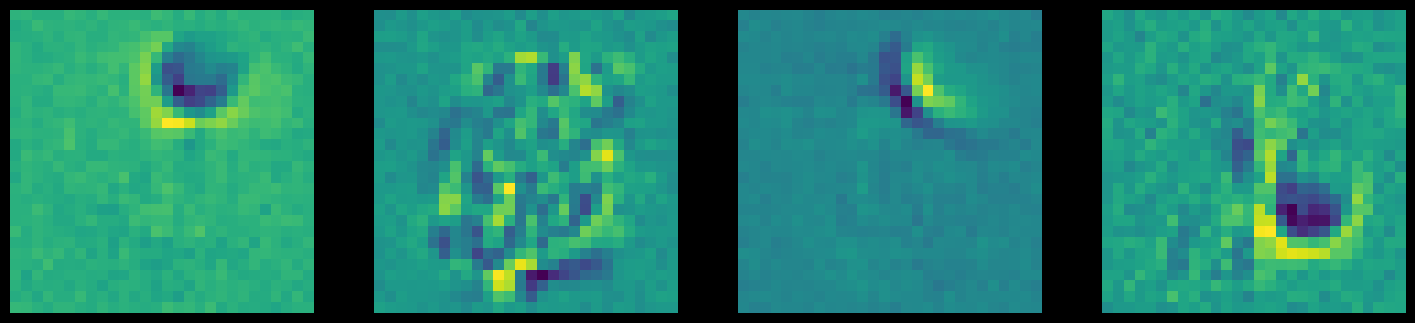

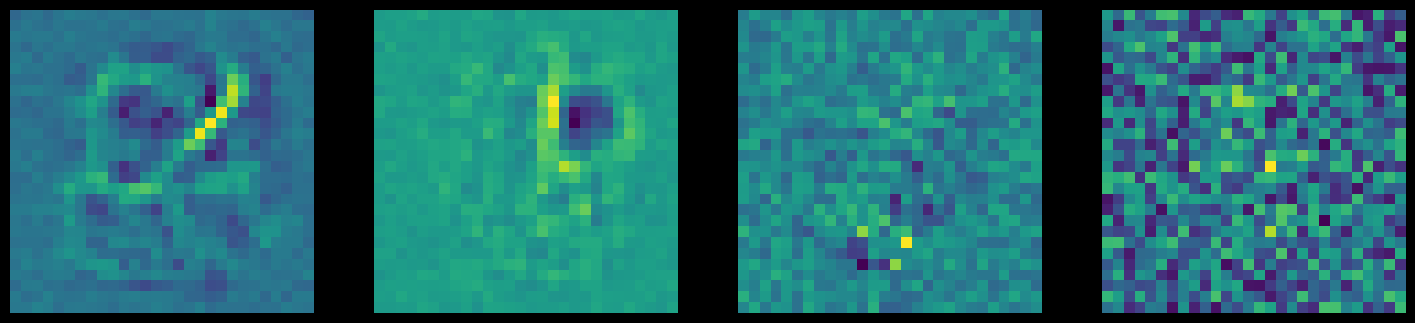

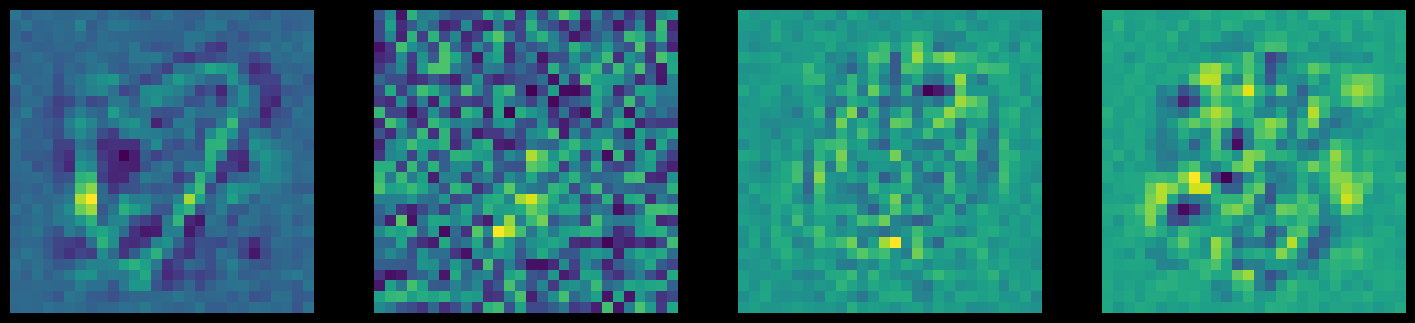

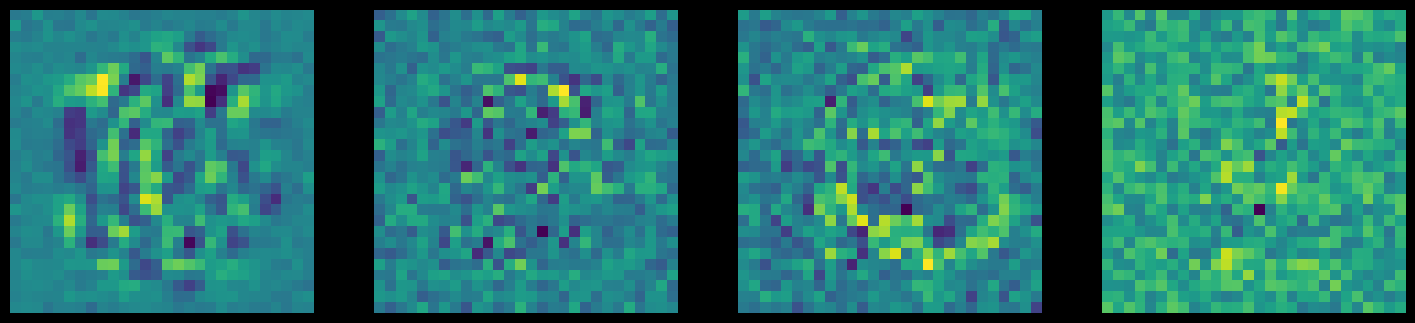

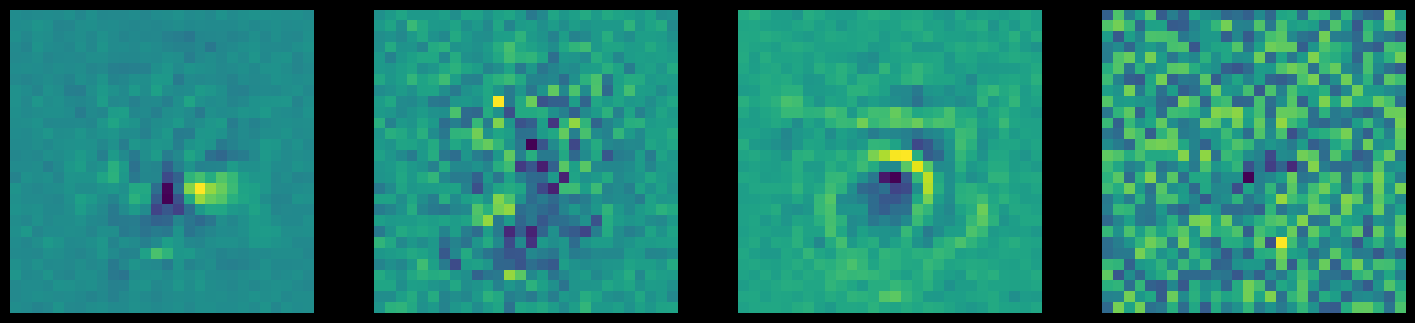

In [13]:
# Visualise a few kernels of the encoder

display_images(None, model.encoder[0].weight, 5)

In [1]:
# Let's compare the autoencoder inpainting capabilities vs. OpenCV
# RUN THIS ONLY AFTER HAVING TRAINED A DENOISING AE!!!

from cv2 import inpaint, INPAINT_NS, INPAINT_TELEA

In [4]:
# Inpaint with Telea and Navier-Stokes methods

dst_TELEA = list()
dst_NS = list()

for i in range(0, 5):
    corrupted_img = ((img_bad.data.cpu()[i].view(28, 28) / 4 + 0.5) * 255).byte().numpy()
    mask = 2 - noise.cpu()[i].view(28, 28).byte().numpy()
    dst_TELEA.append(inpaint(corrupted_img, mask, 3, INPAINT_TELEA))
    dst_NS.append(inpaint(corrupted_img, mask, 3, INPAINT_NS))

tns_TELEA = [torch.from_numpy(d) for d in dst_TELEA]
tns_NS = [torch.from_numpy(d) for d in dst_NS]

TELEA = torch.stack(tns_TELEA).float()
NS = torch.stack(tns_NS).float()

NameError: name 'img_bad' is not defined

In [ ]:
# Compare the results: [noise], [img + noise], [img], [AE, Telea, Navier-Stokes] inpainting

with torch.no_grad():
    display_images(noise[0:5], img_bad[0:5])
    display_images(img[0:5], output[0:5])
    display_images(TELEA, NS)

# Experimenting

The section below needs some more love and refactorin

In [ ]:
display_images(None, img, n=4)

In [ ]:
A, B = 0, 9
y = (img[[A]] + img[[B]])/2
with torch.no_grad():
    ỹ = model(y)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(to_img(y).squeeze())
plt.subplot(122)
plt.imshow(to_img(ỹ).squeeze())

In [ ]:
N = 16
samples = torch.Tensor(N, 28 * 28).to(device)
for i in range(N):
    samples[i] = i / (N - 1) * img[B].data + (1 - i / (N - 1) ) * img[A].data
with torch.no_grad():
    reconstructions = model(samples)[0]

plt.title(f'{A = }, {B = }')
plt.plot(samples.sub(reconstructions).pow(2).sum(dim=(1)), '-o')